In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:

# =====================
# 1. Load CIFAR-10 Dataset
# =====================
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:

# =====================
# 2. Define CNN Architecture
# =====================
model = Sequential([
    # First Conv Block
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    # Second Conv Block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Third Conv Block
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')   # 10 output classes
])


C:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

# =====================
# 3. Compile Model
# =====================
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:

# =====================
# 4. Train Model
# =====================
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.2647 - loss: 1.9477 - val_accuracy: 0.4963 - val_loss: 1.4158
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.4924 - loss: 1.4094 - val_accuracy: 0.5701 - val_loss: 1.1771
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5684 - loss: 1.2199 - val_accuracy: 0.6166 - val_loss: 1.0731
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6082 - loss: 1.1164 - val_accuracy: 0.6430 - val_loss: 1.0098
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6440 - loss: 1.0240 - val_accuracy: 0.6624 - val_loss: 0.9635
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6708 - loss: 0.9493 - val_accuracy: 0.6821 - val_loss: 0.9175
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6942 - loss: 0.8816 - val_accuracy: 0.6762 - val_loss: 0.9173
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7100 - loss: 0.8432 - 

In [6]:
# =====================
# 5. Evaluate Model
# =====================
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy on CIFAR-10: {acc*100:.2f}%")


Test Accuracy on CIFAR-10: 71.27%


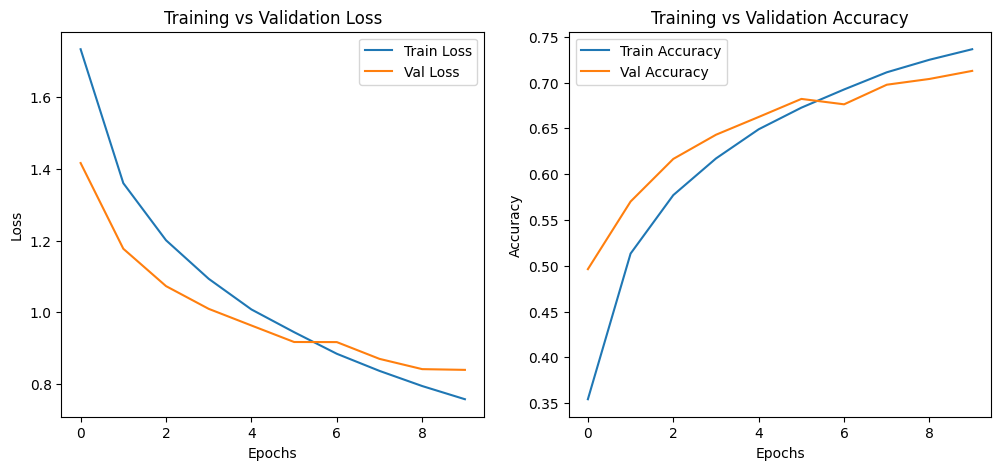

In [7]:

# =====================
# 6. Plot Loss & Accuracy
# =====================
plt.figure(figsize=(12,5))

# Training vs Validation Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

# Training vs Validation Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.show()
